## Module 4:

## Team Members:
Shreesh Kalagi and Max Calcoen

## Project Title:
Developing an SIR model of the COVID outbreak in China 2022


## Project Goal:
This project seeks to develop an SIR model of the China 2022 COVID outbreak.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
    * COVID-19 emerged in Wuhan, China, in December of 2019. The virus spread rapidly within China and then worldwide through sustained human-to-human transmission, leading the WHO to declare a pandemic in March 2020. By 10 November 2024 more than 776 million confirmed cases and over 7 million confirmed deaths had been reported to WHO globally, though true infections are believed to be higher because of under-ascertainment, and COVID-19 has shifted from acute pandemic waves to an endemic pattern with lower but persistent incidence. China initially kept incidence relatively low through “zero-COVID” controls, but after these measures were lifted in 2022, the country experienced massive Omicron waves from roughly November 2022 through mid-2023, with modeling studies suggesting very rapid nationwide spread and analyses of excess mortality estimating on the order of 1–2 million additional deaths in just the first two months after the policy change.
* Economic burden
    * COVID had a significant economic burden on the global scale. As sickness and quarantine inhibited the productivity of nearly every organization, the global market plummeted and a recession ensued. Specifically in China, several "Zero-COVID" policies, including transportation and public space support. As a result of the pandemic in China in the year 2022, the country lost 4% of its GDP. Loss of productivity due to a detrimented workforce in China caused a national recession in China. The cost of living increased drastically, placing a financial burden on Chinese citizens.

* Risk factors (genetic, lifestyle) & Societal determinants
    * The primary risk factor associated with COVID was direct contact with infected individuals. Thus, those prone to frequent human contact, including those who worked at customer-facing businesses and employees of the state (law enforcement, fire and rescue), were at high risk. Other risk factors include being immunocompromised (conditions including cancers, heart and lung diseases, obesity) and those of older ages. Vaccination, including primary and booster doses, helps to reduce risk of infection of COVID.

* Symptoms
    * Symptoms of COVID often mimic those of the common cold: Fever, chills, SOB, sore throat, congestion, loss of sense of taste or smell, fatigue, myalgia, headache, and vertigo (CDC). Symptoms are often more severe for those who are immunocompromised and those of older age. Some individuals may not experience any symptoms but still are a "carrier" of the disease.

* Diagnosis
    * There are two main forms of diagnosis for COVID. One accurate method of diagnosis is PCR tests, which look at genetic material from human samples in order to identify presence of the disease. PCR tests are frequently completed by healthcare professionals in laboratories. Another form of diagnosis is antigen testing, also known as "rapid" testing. These tests detect presence of antigens in a sample. They are much faster than PCR tests (and so are often done at home), but their results are much less reliable. The FDA recommends that if one attains a positive antigen test result that they wait two days and then repeat testing to confirm results.
     
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * SARS-CoV-2, the virus that causes COVID-19, binds to the ACE2 receptor, which is expressed on epithelial cells in the nasal passages, lungs, gut, heart, kidneys, and several other tissues. After attachment, the virus enters cells and triggers cytopathic effects and an immune response. In the respiratory tract, infection of type II alveolar cells disrupts surfactant production and impairs gas exchange, contributing to hypoxemia. The innate immune system responds with interferons and inflammatory cytokines, and in severe cases, dysregulation of this response leads to exaggerated inflammation, vascular leakage, microthrombosis, and multiorgan involvement. This response explains complications such as pulmonary embolisms, myocarditis, and kidney injury.
Sources:

https://www.sciencedirect.com/science/article/pii/S1043951X23001864

https://www.cdc.gov/covid/risk-factors/index.html

https://www.cdc.gov/covid/signs-symptoms/index.html

https://www.mayoclinic.org/diseases-conditions/coronavirus/diagnosis-treatment/drc-20479976

https://pmc.ncbi.nlm.nih.gov/articles/PMC7153464

https://www.nature.com/articles/s41467-023-39638-4

https://www.nature.com/articles/s41579-022-00713-0

## Dataset: 

The dataset consists of a two-column table containing dates and confirmed case counts for COVID in China in the spring of 2022. These data originate from online case-tracking databases, then standardized. Case counts are reported daily. All values are measured as counts of confirmed cases, which serve as a proxy for observed infections.

## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

         date  confirmed_cases
0  2022-02-22           189565
1  2022-02-23           198478
2  2022-02-24           207599
3  2022-02-25           217932
4  2022-02-26           292792


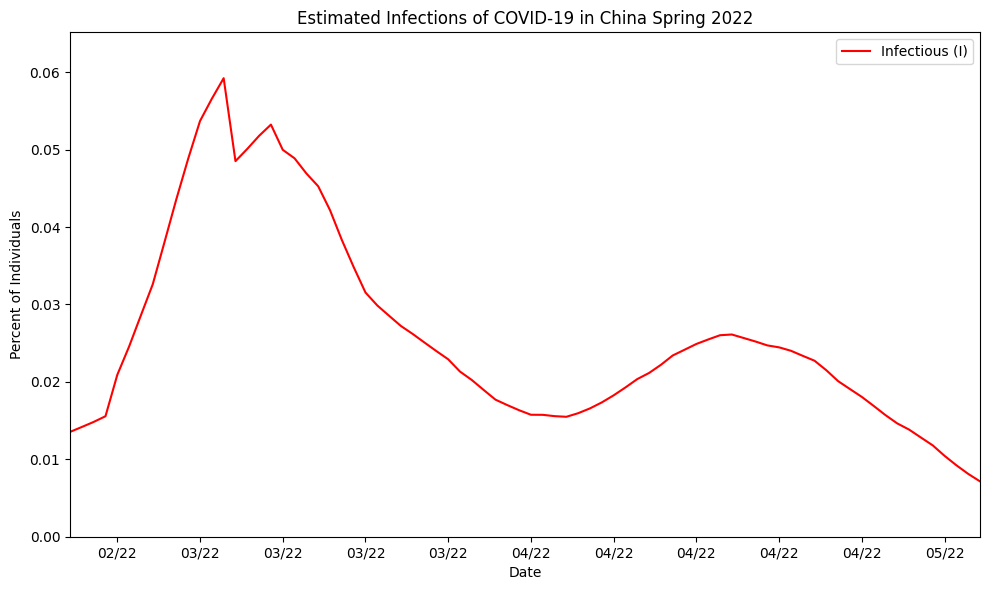

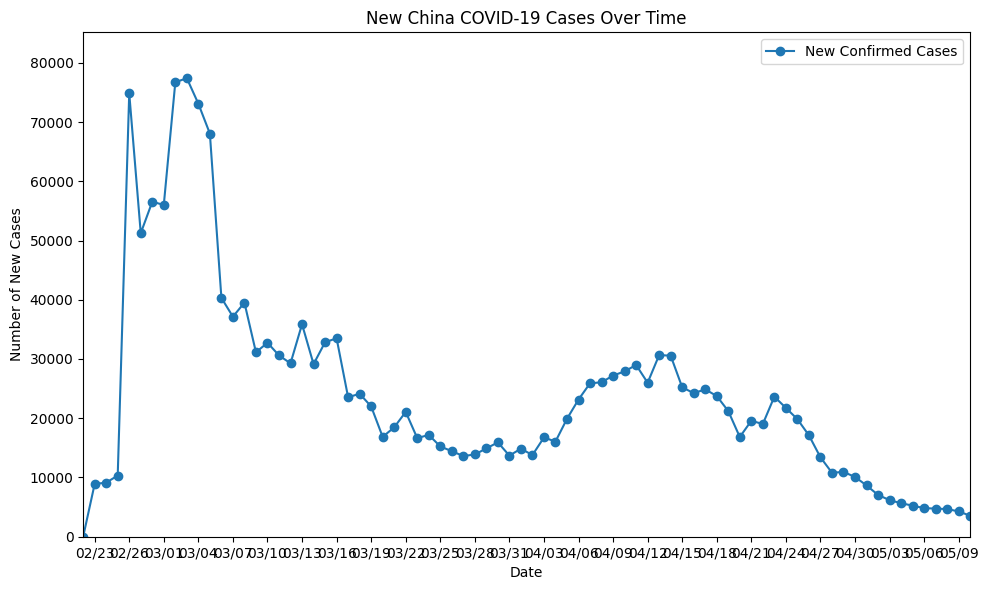

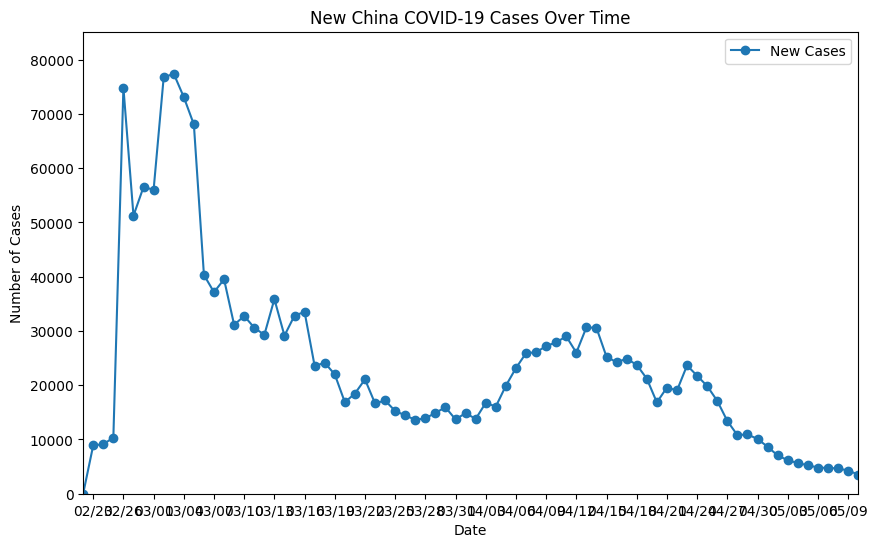

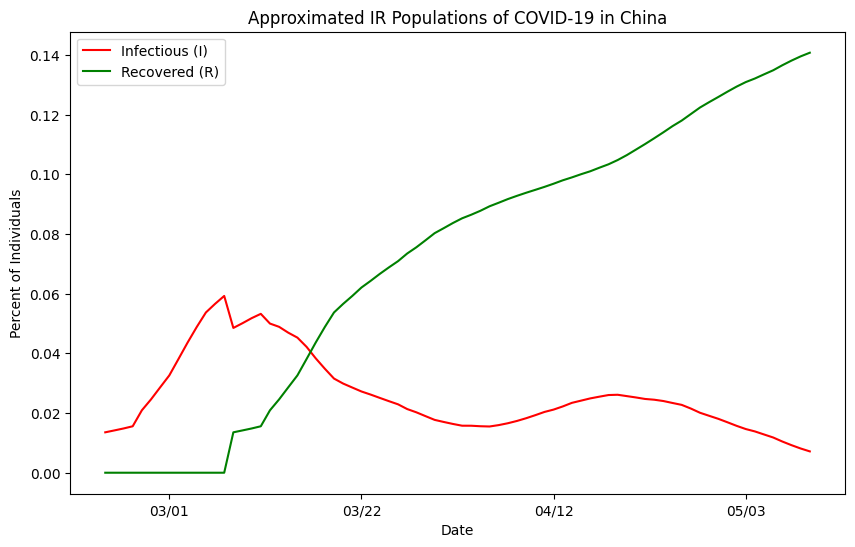

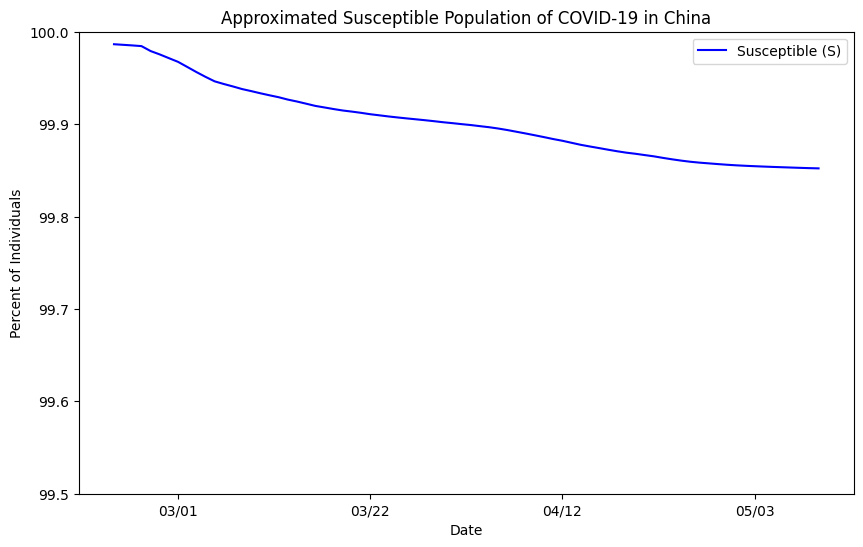

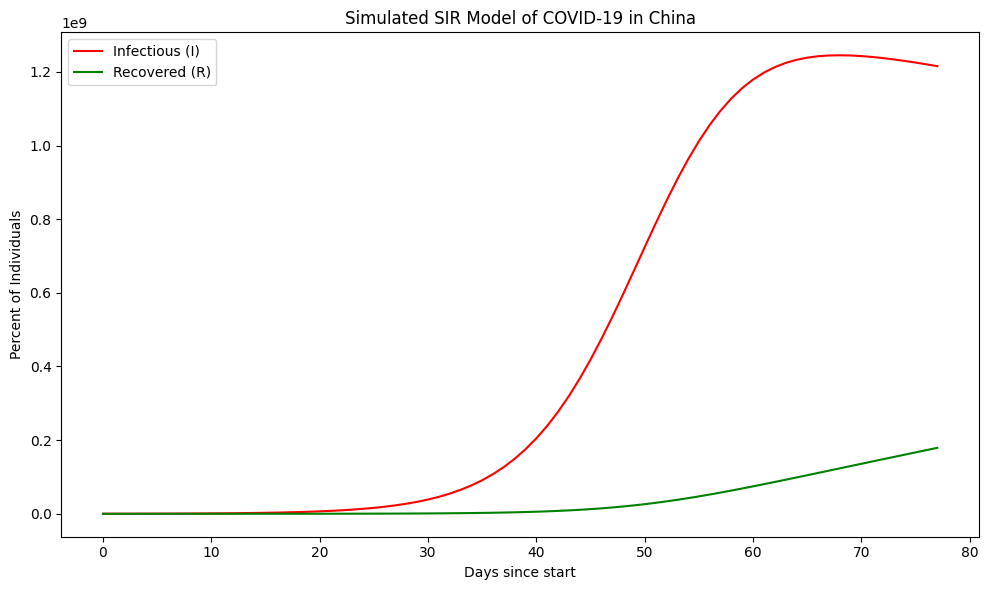

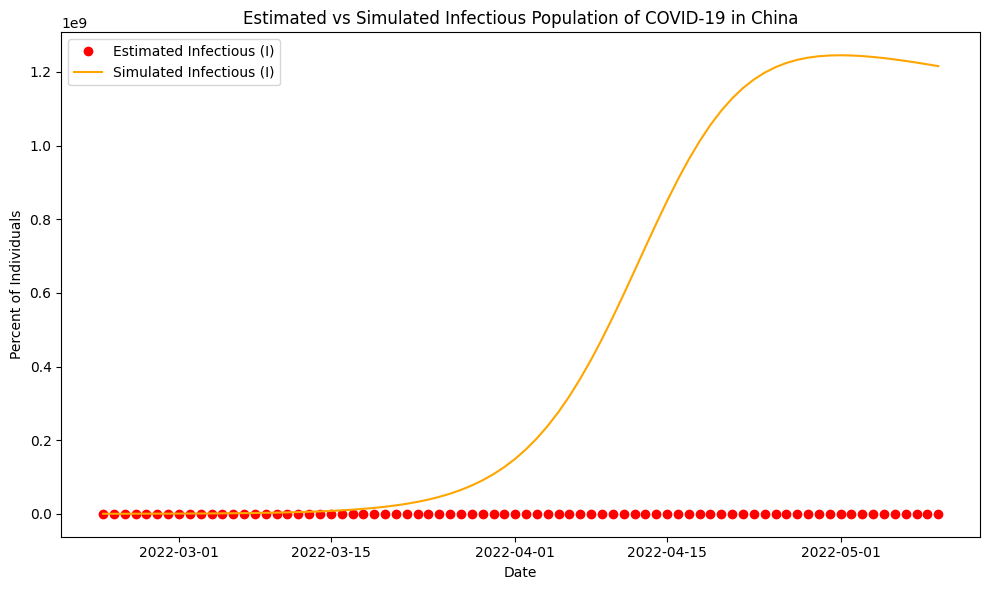

Optimized beta: 0.21877758899286648, Optimized gamma: 0.06029812029209807


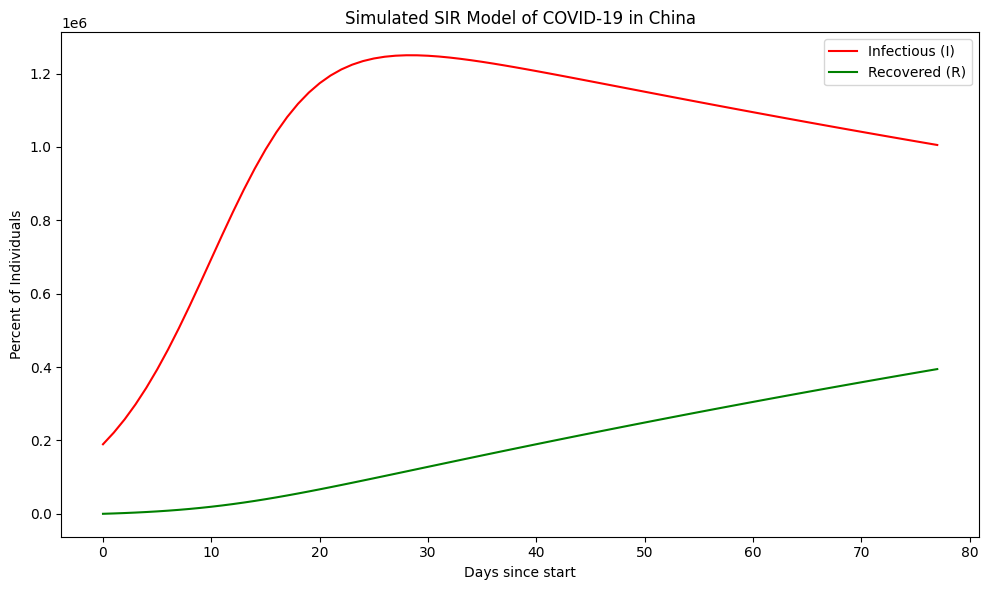

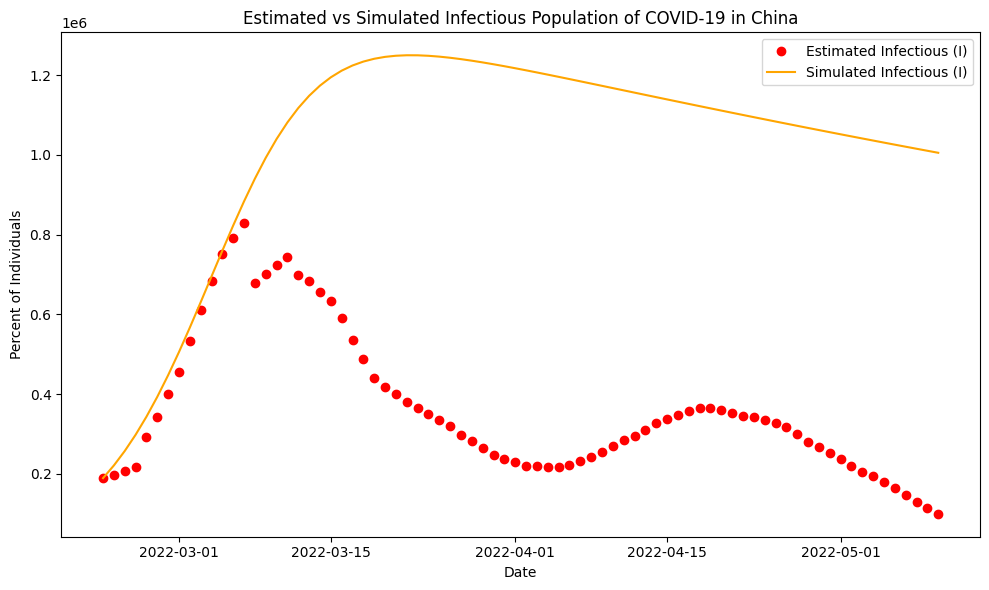

Optimized beta (first half): 0.26510256779784025, Optimized gamma (first half): 0.07308486397895375


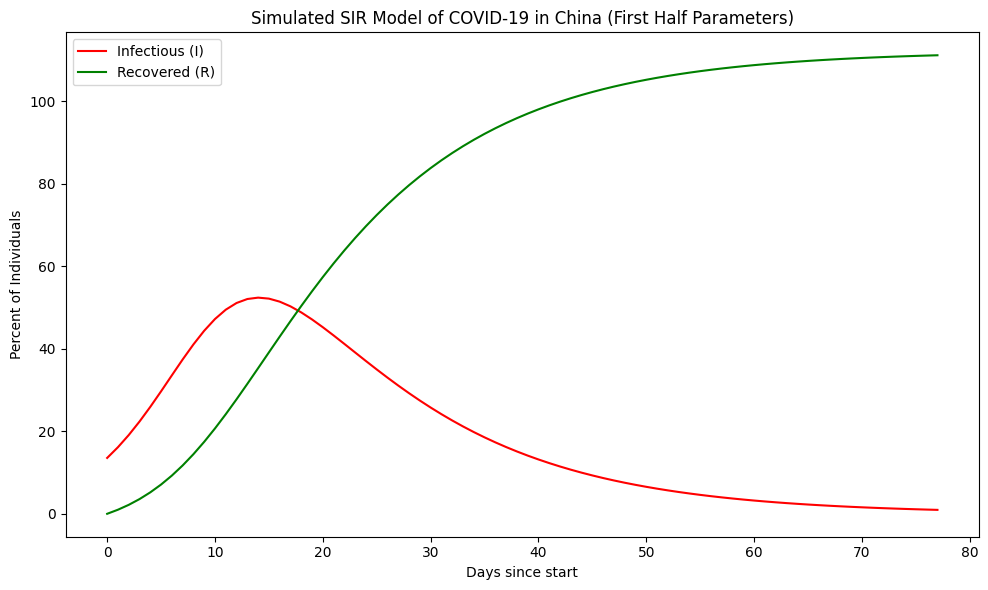

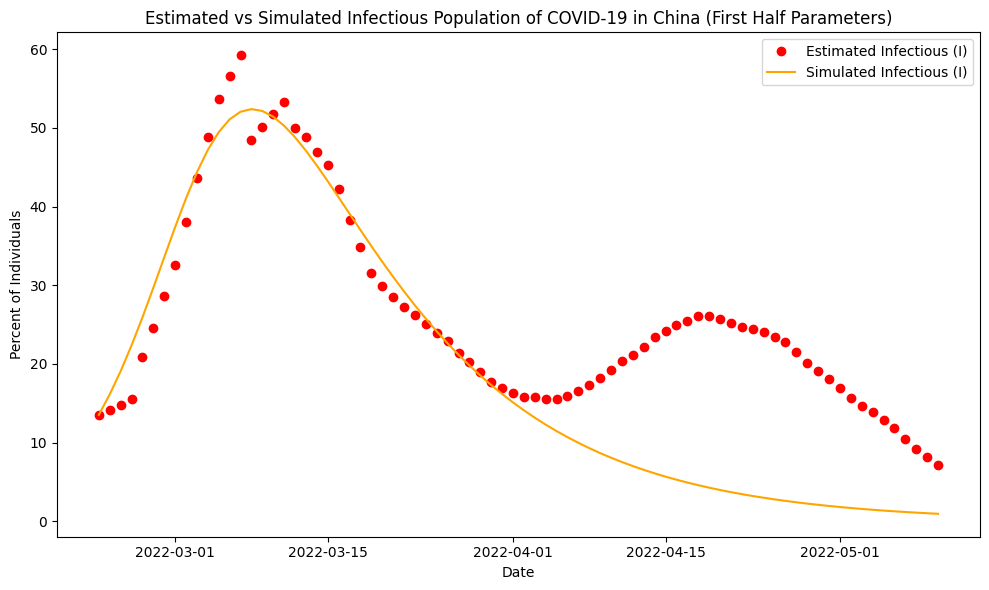

0.21877758899286648 0.06029812029209807 0.26510256779784025 0.07308486397895375
3426719662001.462 2655472202945.716 False 771247459055.7461
Optimized beta (IVP): 0.2657424534281002, Optimized gamma (IVP): 0.07168399163359879


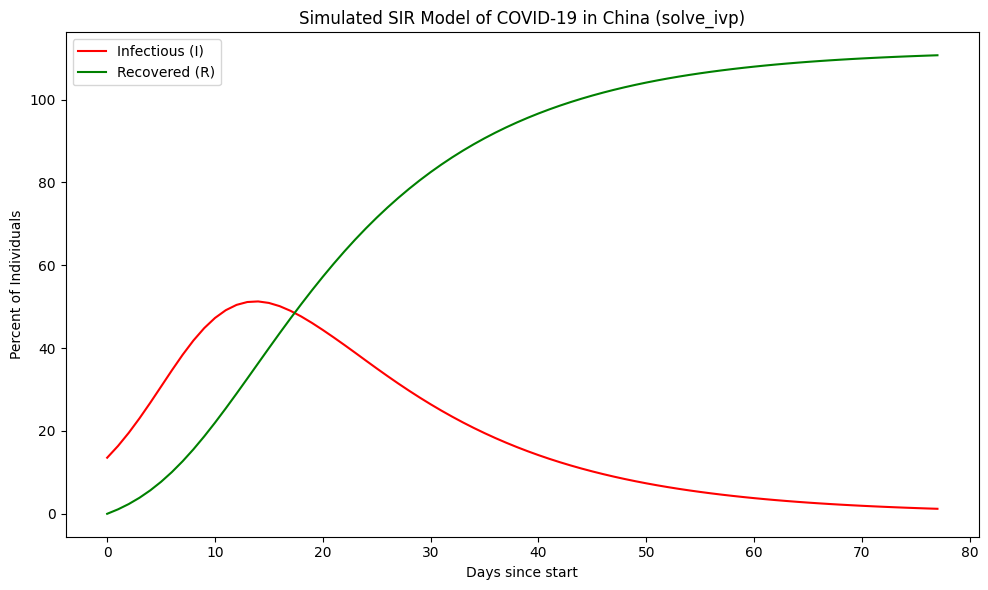

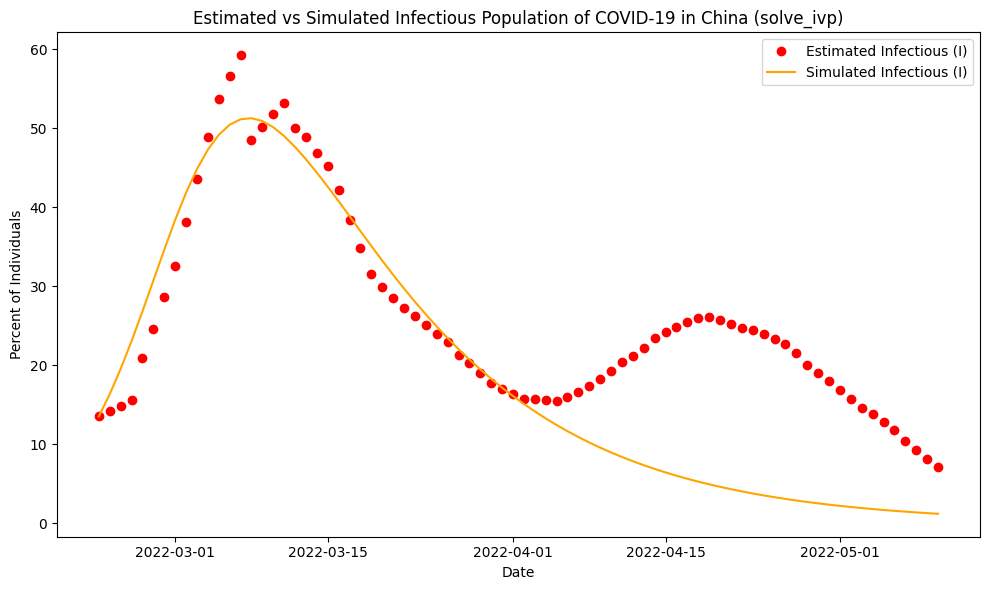

2655472202945.716 2614723406664.8057 True 40748796280.91016


In [1]:
# exported as .py from main.ipynb
# %%
## LOAD YOUR DATASET HERE.
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Read in the csv file of cumulative cases.
data = pd.read_csv("./data/covid_china_data_spring_2022_cumulative.csv")
# Display the first few rows of the dataset
print(data.head())

# Ensure date column is in datetime format
data["date"] = pd.to_datetime(data["date"])

# preprocess:
# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
# new cases each day does not represent the number of currently infectious individuals I(t)
# Let's use the convert_cumulative_to_SIR function to approximate S(t), I(t), and R(t) from the data
population = 1.4e9 # China population approx as of 2022
data_sir = convert_cumulative_to_SIR(
    data,
    date_col="date",
    cumulative_col="confirmed_cases",
    population=population,
    infectious_period=14,
    new_case_col="new_cases",
    I_col="I_est",
    R_col="R_est",
    S_col="S_est",
)

# Ensure date column in data_sir is in datetime format
data_sir["date"] = pd.to_datetime(data_sir["date"])

# 3. Plot S, I, R over time.

plt.figure(figsize=(10, 6))

# convert I_est to percent of population to match the axis label
I_pct = data_sir["I_est"] / population * 100.0
plt.plot(data_sir["date"], I_pct, label="Infectious (I)", color="red")

plt.xlabel("Date")
plt.xlim(pd.Timestamp("2022-02-22"), pd.Timestamp("2022-05-10"))

# dynamic y-limits so the curve isn’t squashed or clipped
plt.ylim(0, I_pct.max() * 1.1)

# use a portable date format string and a reasonable locator
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

plt.ylabel("Percent of Individuals")
plt.title("Estimated Infections of COVID-19 in China Spring 2022")
plt.legend()
plt.tight_layout()
plt.show()

# Let's look at new infections (incidence) over time: I(t)

# notice that we are taking the difference between days to get new cases
data["new_cases"] = data["confirmed_cases"].diff().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(data["date"], data["new_cases"], label="New Confirmed Cases", marker="o")
plt.xlabel("Date")

# dynamic y-limits so we see the full range of new cases
plt.ylim(0, data["new_cases"].max() * 1.1)

plt.xlim(pd.Timestamp("2022-02-22"), pd.Timestamp("2022-05-10"))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.ylabel("Number of New Cases")
plt.title("New China COVID-19 Cases Over Time")
plt.legend()
plt.tight_layout()
plt.show()

# here
plt.figure(figsize=(10, 6))
plt.plot(data["date"], data["new_cases"], label="New Cases", marker="o")
plt.xlabel("Date")
plt.ylim(0, data["new_cases"].max() * 1.1)
plt.xlim(pd.Timestamp("2022-02-22"), pd.Timestamp("2022-05-10"))

# Format ticks as M/Y (no leading zeros)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.ylabel("Number of Cases")
plt.title("New China COVID-19 Cases Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

S_pct = data_sir["S_est"] / population * 100.0
I_pct = data_sir["I_est"] / population * 100.0
R_pct = data_sir["R_est"] / population * 100.0

# Plot only I and R so they are visible on the same scale
plt.plot(data_sir["date"], I_pct, label="Infectious (I)", color="red")
plt.plot(data_sir["date"], R_pct, label="Recovered (R)", color="green")

plt.xlabel("Date")
# plt.ylim(0, 8e9)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
plt.ylabel("Percent of Individuals")
plt.title("Approximated IR Populations of COVID-19 in China")
plt.legend()
plt.show()

# SEPARATELY PLOTTED: S, the susceptible population, is very close to 100% throughout the time period

plt.figure(figsize=(10, 6))
plt.plot(data_sir["date"], S_pct, label="Susceptible (S)", color="blue")
plt.xlabel("Date")
plt.ylim(99.5, 100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
plt.ylabel("Percent of Individuals")
plt.title("Approximated Susceptible Population of COVID-19 in China")
plt.legend()
plt.show()

# %%
# euler's method to simulate SIR model
import numpy as np
from main_functions import euler_sir

def euler_sir_plot(beta, gamma, S0, I0, R0, population, plot=False):


    # Use realistic parameters for COVID-19
    beta = 0.2  # infection rate (per day)
    gamma = 0.005  # recovery rate (per day)

    I0 = data_sir["I_est"].iloc[0]  # initial infected
    S0 = population - I0  # initial susceptible
    R0 = 0  # initial recovered

    # model through entire period
    days = (data_sir["date"].max() - data_sir["date"].min()).days
    t = np.arange(days + 1)  # time array, 0 to days

    S, I, R = euler_sir(beta, gamma, S0, I0, R0, t, population)
    if not plot:
        return S, I, R

    # plot the results as percent of population
    plt.figure(figsize=(10, 6))
    plt.plot(t, I, label="Infectious (I)", color="red")
    # plt.plot(t, S, label="Susceptible (S)", color="blue")
    plt.plot(t, R, label="Recovered (R)", color="green")
    plt.xlabel("Days since start")
    plt.ylabel("Percent of Individuals")
    plt.title("Simulated SIR Model of COVID-19 in China")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # plot over I(t) estimated from data
    plt.figure(figsize=(10, 6))
    plt.plot(data_sir["date"], data_sir["I_est"], label="Estimated Infectious (I)", color="red", marker="o", linestyle="None")
    sim_dates = data_sir["date"].min() + pd.to_timedelta(t, unit="D")
    plt.plot(sim_dates, I, label="Simulated Infectious (I)", color="orange")
    plt.xlabel("Date")
    plt.ylabel("Percent of Individuals")
    plt.title("Estimated vs Simulated Infectious Population of COVID-19 in China")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return S, I, R

euler_sir_plot(beta=0.2, gamma=0.005, S0=population - 1, I0=1, R0=0, population=population, plot=True)

# %%
# scipy optimize
import scipy.optimize as opt

# error of the SIR model compared to estimated I(t)
def sir_model_error(params, data_sir, population):
    
    beta, gamma = params
    S0 = population - 1
    I0 = data_sir["I_est"].iloc[0]
    R0 = 0

    days = (data_sir["date"].max() - data_sir["date"].min()).days
    t = np.arange(days + 1)

    S, I, R = euler_sir(beta, gamma, S0, I0, R0, t, population)

    # Interpolate model I values to match data_sir dates
    model_I_interp = np.interp(
        (data_sir["date"] - data_sir["date"].min()).dt.days,
        t,
        I
    )

    # Calculate error as sum of squared differences
    error = np.sum((data_sir["I_est"] - model_I_interp) ** 2)
    return error

# Initial guess for beta and gamma
initial_params = [0.2, 0.005]
# Optimize parameters to minimize error
pop_test = 1.4e6 # 10^3 times less
optimized_params = opt.minimize(sir_model_error, initial_params, args=(data_sir, pop_test), bounds=[(0.00001, 2.0), (0.00001, 1.0)])
beta_opt, gamma_opt = optimized_params.x
print(f"Optimized beta: {beta_opt}, Optimized gamma: {gamma_opt}")

# %%
euler_sir_plot(
    beta=beta_opt,
    gamma=gamma_opt,
    S0=pop_test - 1,
    I0=1,
    R0=0,
    population=pop_test,
    plot=True,
)

# %%
# 2.  Predict "the future" with your fit SIR model:
# - Use euler's method and your optimization routine above to find new gamma and beta on the FIRST HALF of the data,
# then simulate the SIR model forward in time using those parameters and plot.

# split data
mid_index = len(data_sir) // 2
data_sir_first_half = data_sir.iloc[:mid_index]
data_sir_second_half = data_sir.iloc[mid_index:]

# initial guess for beta and gamma
initial_params = [beta_opt, gamma_opt]
# optimize parameters on first half of data
pop_test = 1.4e6 # 10^3 times less

optimized_params_half = opt.minimize(sir_model_error, initial_params, args=(data_sir_first_half, pop_test), bounds=[(0.00001, 2.0), (0.00001, 1.0)])
beta_half, gamma_half = optimized_params_half.x
print(f"Optimized beta (first half): {beta_half}, Optimized gamma (first half): {gamma_half}")

# %%
# model using first half parameters
S0 = pop_test - 1
I0 = data_sir_first_half["I_est"].iloc[0]
R0 = 0

days = (data_sir["date"].max() - data_sir["date"].min()).days
t = np.arange(days + 1)

# simulate SIR model with first half parameters for full time period
S, I, R = euler_sir(beta_half, gamma_half, S0, I0, R0, t, pop_test)

# plot I and R
plt.figure(figsize=(10, 6))
plt.plot(t, I * 100 / pop_test, label="Infectious (I)", color="red")
plt.plot(t, R * 100 / pop_test, label="Recovered (R)", color="green")
plt.xlabel("Days since start")
plt.ylabel("Percent of Individuals")
plt.title("Simulated SIR Model of COVID-19 in China (First Half Parameters)")
plt.legend()
plt.tight_layout()
plt.show()

# plot with overlay of real data
plt.figure(figsize=(10, 6))
plt.plot(data_sir["date"], data_sir["I_est"] * 100 / pop_test, label="Estimated Infectious (I)", color="red", marker="o", linestyle="None")
sim_dates = data_sir["date"].min() + pd.to_timedelta(t, unit="D")
plt.plot(sim_dates, I * 100 / pop_test, label="Simulated Infectious (I)", color="orange")
plt.xlabel("Date")
plt.ylabel("Percent of Individuals")
plt.title("Estimated vs Simulated Infectious Population of COVID-19 in China (First Half Parameters)")
plt.legend()
plt.tight_layout()
plt.show()

# %%
print(beta_opt, gamma_opt, beta_half, gamma_half)

# %%
# calculate SSE for both fits for second half of the data
sse_full = sir_model_error([beta_opt, gamma_opt], data_sir_second_half, pop_test)
sse_half = sir_model_error([beta_half, gamma_half], data_sir_second_half, pop_test)
print(sse_full, sse_half, sse_half > sse_full, sse_full-sse_half)
# SSE half is larger than SSE full, as expected since fewer data points were used for fitting

# %% [markdown]
# - Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?
# The new gamma and beta are close. The fit actually looks better visually across the entire time period. The SSE across the second half is better (3426719662001.462 vs 2655472202945.716, or SSE is 771247459055.7461 larger).
# 
# - Calculating SSE between model predictions and data on the SECOND HALF of the data.
# 
# print(sse_full, sse_half, sse_half > sse_full, sse_full-sse_half)
# 3426719662001.462 2655472202945.716 False 771247459055.7461
# 
# - Describe how using a different method like the midpoint method might lower the numerical error.
# The midpoint method reduces the local truncation error from order O(\Delta t^2) to O(\Delta t^3). Over many steps, this smaller error per step accumulates more slowly, so the numerical solution for S(t), I(t), R(t) stays closer to the true continuous-time dynamics and thus lowers the overall SSE.

# %%

# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.
# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.

from scipy.integrate import solve_ivp
from main_functions import sir_model_solve_ivp

# error of the SIR model using solve_ivp compared to estimated I(t)
def sir_model_error_ivp(params, data_sir, population):
    beta, gamma = params
    S0 = population - 1
    I0 = data_sir["I_est"].iloc[0]
    R0 = 0

    days = (data_sir["date"].max() - data_sir["date"].min()).days
    t = np.arange(days + 1)

    S, I, R = sir_model_solve_ivp(beta, gamma, S0, I0, R0, t, population)

    # Interpolate model I values to match data_sir dates
    model_I_interp = np.interp(
        (data_sir["date"] - data_sir["date"].min()).dt.days,
        t,
        I
    )

    # Calculate error as sum of squared differences
    error = np.sum((data_sir["I_est"] - model_I_interp) ** 2)
    return error

# Initial guess for beta and gamma
initial_params = [beta_opt, gamma_opt]
# Optimize parameters to minimize error using solve_ivp
pop_test = 1.4e6 # 10^3 times less
# use first half of data to train
optimized_params_ivp = opt.minimize(sir_model_error_ivp, initial_params, args=(data_sir_first_half, pop_test), bounds=[(0.00001, 2.0), (0.00001, 1.0)])
beta_opt_ivp, gamma_opt_ivp = optimized_params_ivp.x
print(f"Optimized beta (IVP): {beta_opt_ivp}, Optimized gamma (IVP): {gamma_opt_ivp}")


# %%
# plot the results as percent of population
S0 = pop_test - 1
I0 = data_sir["I_est"].iloc[0]
R0 = 0

days = (data_sir["date"].max() - data_sir["date"].min()).days
t = np.arange(days + 1)
S, I, R = sir_model_solve_ivp(beta_opt_ivp, gamma_opt_ivp, S0, I0, R0, t, pop_test)

plt.figure(figsize=(10, 6))
plt.plot(t, I * 100 / pop_test, label="Infectious (I)", color="red")
plt.plot(t, R * 100 / pop_test, label="Recovered (R)", color="green")
plt.xlabel("Days since start")
plt.ylabel("Percent of Individuals")
plt.title("Simulated SIR Model of COVID-19 in China (solve_ivp)")
plt.legend()
plt.tight_layout()
plt.show()

# plot over I(t) estimated from data
plt.figure(figsize=(10, 6))
plt.plot(data_sir["date"], data_sir["I_est"] * 100 / pop_test, label="Estimated Infectious (I)", color="red", marker="o", linestyle="None")
sim_dates = data_sir["date"].min() + pd.to_timedelta(t, unit="D")
plt.plot(sim_dates, I * 100 / pop_test, label="Simulated Infectious (I)", color="orange")
plt.xlabel("Date")
plt.ylabel("Percent of Individuals")
plt.title("Estimated vs Simulated Infectious Population of COVID-19 in China (solve_ivp)")
plt.legend()
plt.tight_layout()
plt.show()

# %%
# find sse of both methods on second half of data
sse_euler = sir_model_error([beta_half, gamma_half], data_sir_second_half, pop_test)
sse_ivp = sir_model_error_ivp([beta_opt_ivp, gamma_opt_ivp], data_sir_second_half, pop_test)
print(sse_euler, sse_ivp, sse_ivp < sse_euler, sse_euler - sse_ivp)
# SSE ivp is smaller than SSE euler, as expected

COPIED FROM ABOVE

 - Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?

 The new gamma and beta are close. The fit actually looks better visually across the entire time period. The SSE across the second half is better (3426719662001.462 vs 2655472202945.716, or SSE is 771247459055.7461 larger).
 
 - Calculating SSE between model predictions and data on the SECOND HALF of the data.
 
 print(sse_full, sse_half, sse_half > sse_full, sse_full-sse_half)
 3426719662001.462 2655472202945.716 False 771247459055.7461
 
 - Describe how using a different method like the midpoint method might lower the numerical error.

 The midpoint method reduces the local truncation error from order O(\Delta t^2) to O(\Delta t^3). Over many steps, this smaller error per step accumulates more slowly, so the numerical solution for S(t), I(t), R(t) stays closer to the true continuous-time dynamics and thus lowers the overall SSE.

## Verify and validate your analysis: 

Using scipy's solve_ivp function, we implemented the runge-kutta (RK4) solver in order to check the accuracy of our analysis. After inlcuding the solve_ivp method, we implemented the SIR model simulation in order to find optimal gamma and beta values for our model of disease spread. Then, we calculated the sum of square errors on the second half of the generated model for both the euler's method data and the RK4 method.

There have been a number of studies which incorporate SIR models of COVID-19 spread. One study in partiuclar, "An improved SIR model describing the epidemic dynamics of the COVID-19 in China," uses an SIR model to estimate the rate of infection in China during the window 21/01/2020–08/02/2021. The Euler's method gamma value was 0.005 and the solve_ivp gamma value was 0.07168399163359879, while the study utlizes a gamma value of 0.05, very close to that of the solve_ivp function. Notably, our Euler's method beta value was 0.2 and the solve_ivp beta value was 0.2657424534281002, but the study used a function of time to describe the beta function. This ultimately allowed for a more dynamic modeling of diease spread that may have been resposible for the model's high fidelity to real world data when projecting future data trends.

Source: https://pmc.ncbi.nlm.nih.gov/articles/PMC8105082/

## Conclusions and Ethical Implications: 

Our Euler's method simulation generated a SIR model that was partially accurate according the the SSE calculation of the second half of the data. The solve_ivp method produced a better simulation which may be used to model the spread of COVID-19 in 2022. 

There are several ethical implications of creating an accurate model of disease spread. For one, knowing when waves of infection are imminent allows for the general allocation of vital resources to communities in need. Not only would this help in reducing the spread of disease, but it would also be economically responsible. Finally, this model must be used ethically in that there is always room for error. The accuracy of the model must be assessed in order to determine its viability in the early stages of simulation use.

## Limitations and Future Work: 

Our SIR model was very limited in its basic nature. Studies of dynamic SIR models incorporate a differential equation labeled "E" that model the exposed population. In a future study, we would include this element in order to better model disease spread. In addition, real world studies of COVID spread model the rate of trasmission as a function of time. Again, a future study would incorporate this element in order to create a more dynamic model of disease spread. Calculating SSE values for new models would allow us to assess their validity in comparison to the exisitng SIR model. 

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

none

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*

none